In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=30

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
"Potato disease classification",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

In [6]:
68*32

2176

In [7]:
for images_batch,label_batch in dataset.take(1):
    print(images_batch.shape)
    print(label_batch.numpy)

(32, 256, 256, 3)
<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(32,), dtype=int32, numpy=
array([0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 2, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1])>>


In [8]:
for images_batch,label_batch in dataset.take(1):
    print(images_batch[0])

tf.Tensor(
[[[128. 117. 131.]
  [130. 119. 133.]
  [129. 118. 132.]
  ...
  [109.  99. 110.]
  [114. 104. 115.]
  [123. 113. 124.]]

 [[122. 111. 125.]
  [126. 115. 129.]
  [127. 116. 130.]
  ...
  [112. 102. 113.]
  [117. 107. 118.]
  [125. 115. 126.]]

 [[119. 108. 122.]
  [124. 113. 127.]
  [127. 116. 130.]
  ...
  [112. 102. 113.]
  [115. 105. 116.]
  [122. 112. 123.]]

 ...

 [[181. 171. 179.]
  [177. 167. 175.]
  [171. 161. 169.]
  ...
  [ 84.  62.  65.]
  [ 86.  64.  67.]
  [ 85.  63.  66.]]

 [[175. 165. 173.]
  [172. 162. 170.]
  [170. 160. 168.]
  ...
  [ 80.  58.  61.]
  [ 85.  63.  66.]
  [ 85.  63.  66.]]

 [[169. 159. 167.]
  [168. 158. 166.]
  [170. 160. 168.]
  ...
  [ 78.  56.  59.]
  [ 84.  62.  65.]
  [ 85.  63.  66.]]], shape=(256, 256, 3), dtype=float32)


In [9]:
for images_batch,label_batch in dataset.take(1):
    print(images_batch[0].shape)

(256, 256, 3)


(256, 256, 3)


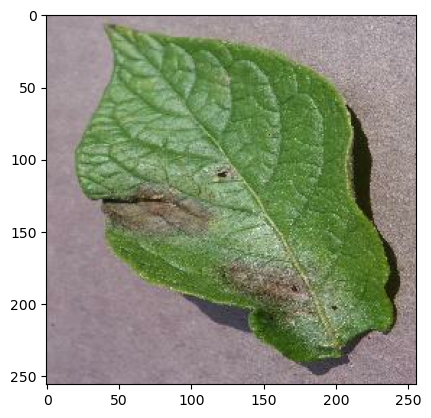

In [10]:
for images_batch,label_batch in dataset.take(1):
    plt.imshow(images_batch[0].numpy().astype("uint8"))
    print(images_batch[0].shape)

(256, 256, 3)


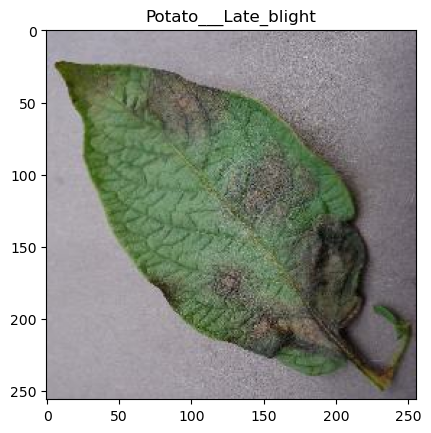

In [11]:
for images_batch,label_batch in dataset.take(1):
    
    plt.imshow(images_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    print(images_batch[0].shape)

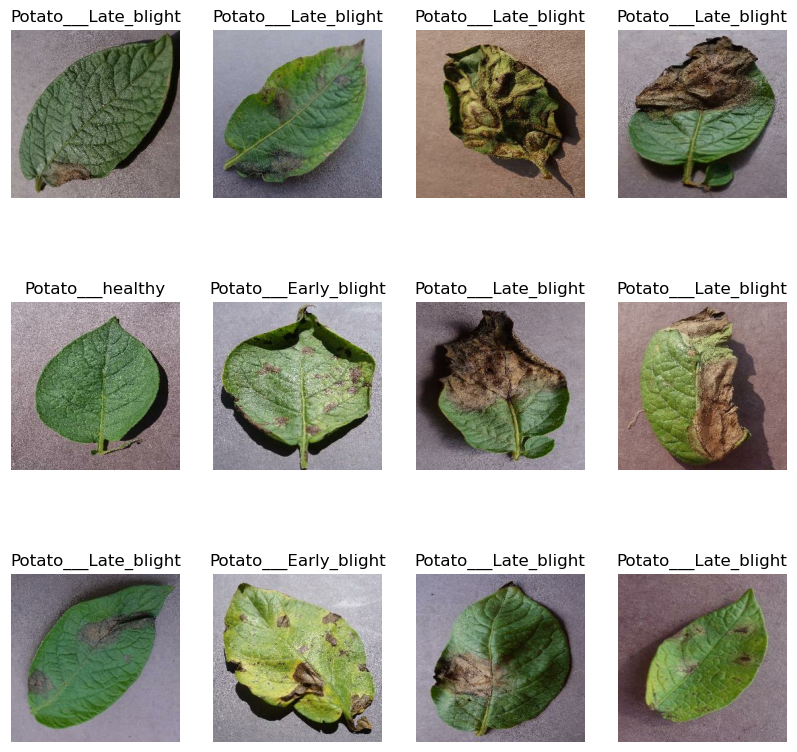

In [12]:
plt.figure(figsize=(10,10))
for images_batch,label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(images_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [13]:
len(dataset)

68

In [14]:
train_size=0.8
len(dataset)*train_size


54.400000000000006

In [15]:
train_ds=dataset.take(54)
len(train_ds)

54

In [16]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [17]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [18]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [19]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [20]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shiffle_size=10000):
    ds_size=len(dataset)
    if shuffle:
        ds=ds.shuffle(shiffle_size,seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    
    train_ds=ds.take(train_size)
    
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [21]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [22]:
len(train_ds),len(val_ds),len(test_ds)

(54, 6, 8)

In [23]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [24]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [25]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2),
    
])

In [26]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])
model.build(input_shape=input_shape)

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [28]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [29]:
history=model.fit(
train_ds,
epochs=EPOCHS,
batch_size=BATCH_SIZE,
verbose=1,
validation_data=val_ds
)

Epoch 1/30
54/54 [==============================] - 63s 1s/step - loss: 0.9135 - accuracy: 0.5174 - val_loss: 0.8816 - val_accuracy: 0.5833
Epoch 2/30
54/54 [==============================] - 57s 1s/step - loss: 0.6854 - accuracy: 0.7147 - val_loss: 0.5292 - val_accuracy: 0.7760
Epoch 3/30
54/54 [==============================] - 53s 988ms/step - loss: 0.4916 - accuracy: 0.7980 - val_loss: 0.3581 - val_accuracy: 0.8698
Epoch 4/30
54/54 [==============================] - 55s 1s/step - loss: 0.3196 - accuracy: 0.8657 - val_loss: 0.2641 - val_accuracy: 0.8958
Epoch 5/30
54/54 [==============================] - 54s 1s/step - loss: 0.2654 - accuracy: 0.8941 - val_loss: 0.2969 - val_accuracy: 0.8854
Epoch 6/30
54/54 [==============================] - 55s 1s/step - loss: 0.2969 - accuracy: 0.8814 - val_loss: 0.2459 - val_accuracy: 0.9115
Epoch 7/30
54/54 [==============================] - 54s 993ms/step - loss: 0.2587 - accuracy: 0.8976 - val_loss: 0.2352 - val_accuracy: 0.8958
Epoch 8/30
54/

In [30]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 5s 381ms/step - loss: 0.3762 - accuracy: 0.8906


In [31]:
scores

[0.3761817216873169, 0.890625]

In [32]:
history

In [33]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 54}

In [34]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [35]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

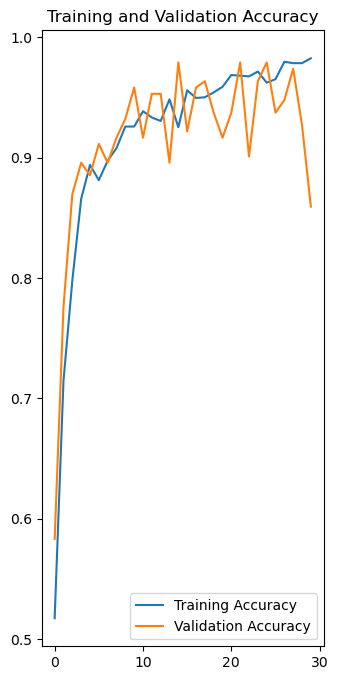

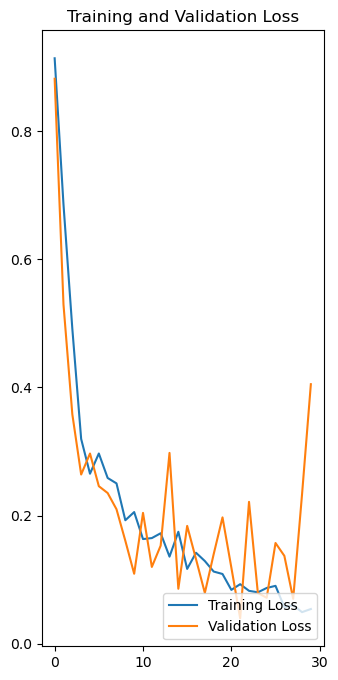

In [48]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')

plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')

plt.legend(loc='lower right')
plt.title('Training and Validation Loss')



first image to predict
actual label Potato___Late_blight
1/1 [==============================] - 0s 443ms/step
Predicted label Potato___Late_blight


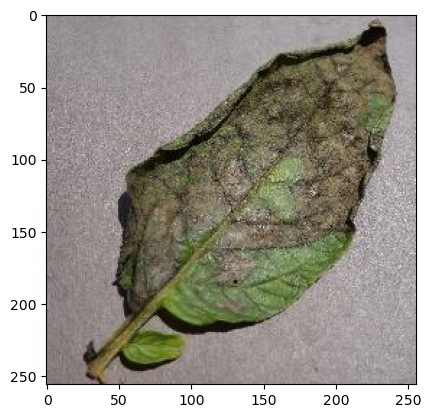

In [71]:
import numpy as np
for images_batch,labels_batch in test_ds.take(1):
    first_image=(images_batch[0].numpy().astype('uint8'))
    first_label=labels_batch[0].numpy()
    
    print('first image to predict')
    plt.imshow(first_image)
    
    print("actual label",class_names[first_label])
    
    batch_prediction=model.predict(images_batch)
    print('Predicted label',class_names[np.argmax(batch_prediction[0])])
    

In [72]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0)
    
    predictions=model.predict(img_array)
    
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*np.max(predictions[0]),2)
    
    return predicted_class, confidence

1/1 [==============================] - 0s 63ms/step


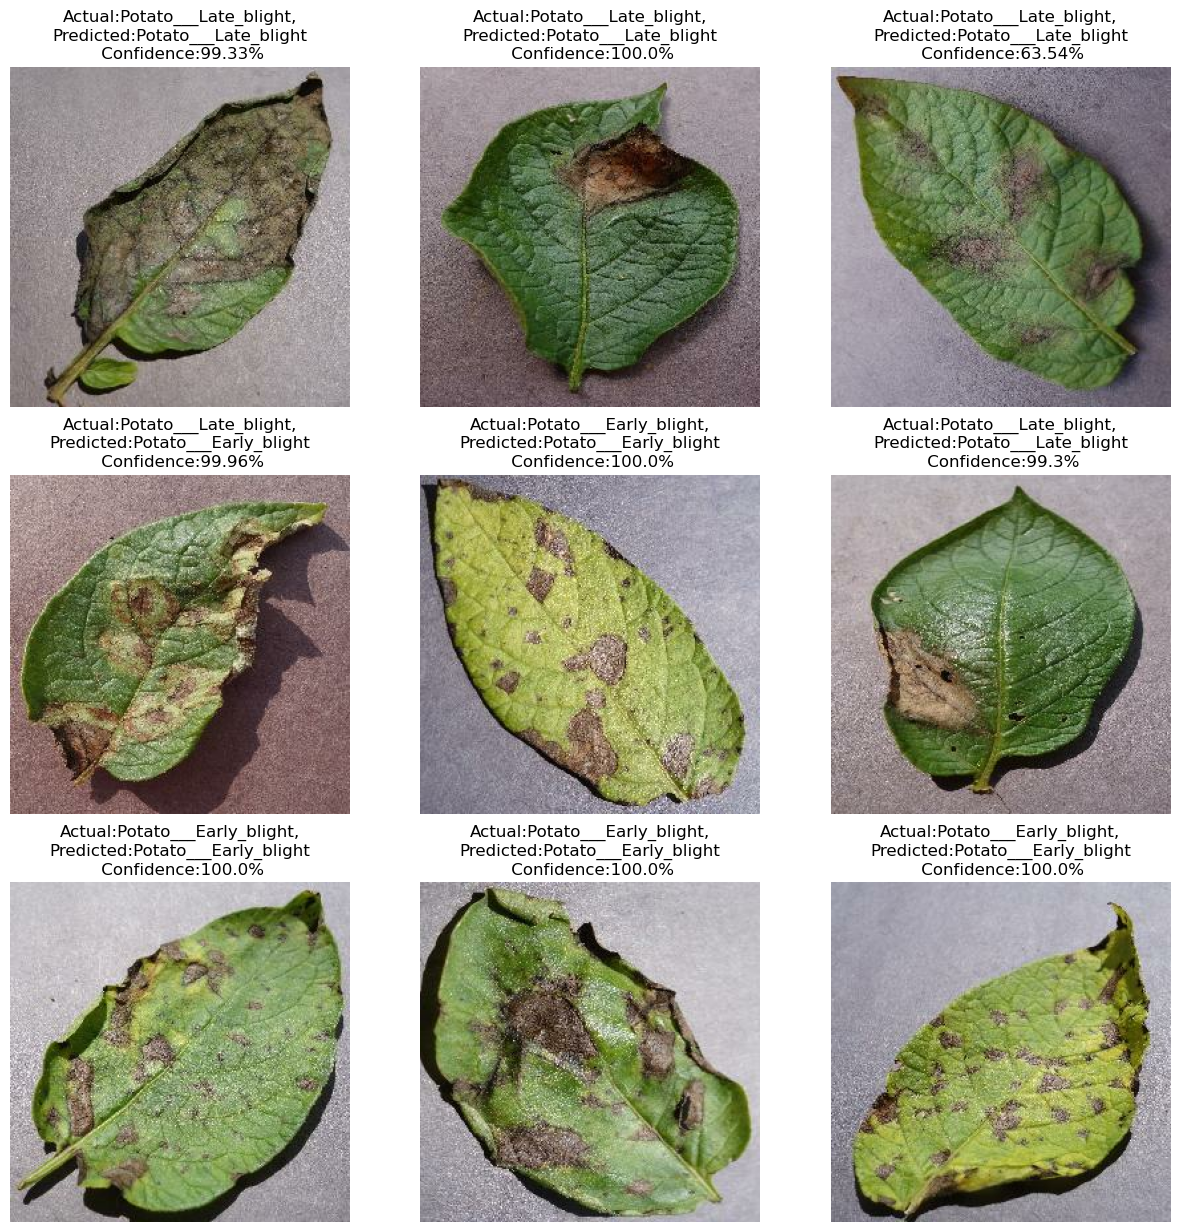

In [75]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class,confidence=predict(model,images[i].numpy())
        actual_class=class_names[labels[i]]
        plt.title(f'Actual:{actual_class},\nPredicted:{predicted_class}\n Confidence:{confidence}%')
        plt.axis("off")

In [81]:
import os
model_version=max([int(i) for i in os.listdir("../models")]+[0])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/2\assets


INFO:tensorflow:Assets written to: ../models/2\assets


1